In [1]:
import numpy as np

import jax.numpy as jnp

from jax import config

config.update("jax_enable_x64", True)

from matplotlib import pyplot as plt

In [2]:
from Utils.loginterp_jax import loginterp_jax

klin, plin = np.loadtxt('Pk_Planck15_Table4.txt', unpack=True);

extrap_min = -5
extrap_max = 3
N = 2000

kint = jnp.logspace(extrap_min,extrap_max,N)
pint = loginterp_jax(klin,plin)(kint)

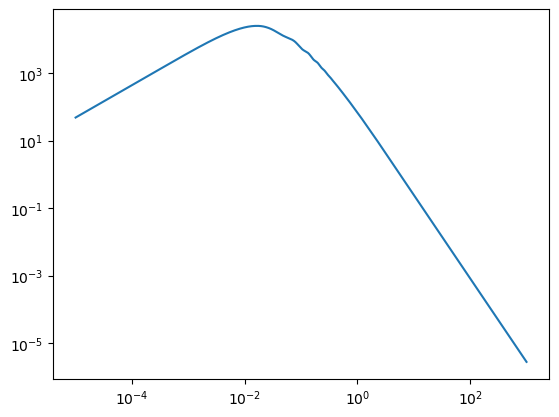

In [3]:
plt.loglog(kint, pint)

In [4]:
from transfer_functions_update_pk import Zenbu

In [5]:
modPT = Zenbu(kint, pint,jn=5)

In [6]:
import time

t1 = time.time()
ptable = modPT.make_ptable()
t2 = time.time()

print(t2-t1)

2.903122901916504


In [7]:
from jax import jit

def ptable_func(pint):
    modPT.update_power_spectrum(pint)
    ptable = modPT.make_ptable()
    return ptable

ptable_jit = jit(ptable_func)
ptable_jit(pint)

t1 = time.time()
ptable = ptable_jit(pint)
t2 = time.time()

print(t2-t1)

0.10613012313842773


In [8]:
extrap_min = -3
extrap_max = 2
N = 1000

kint = jnp.logspace(extrap_min,extrap_max,N)
pint = loginterp_jax(klin,plin)(kint)

In [21]:
modPT = Zenbu(kint, pint,jn=5, kmin=0.05, kmax=0.3, nk=100)

In [22]:
def ptable_func(pint):
    modPT.update_power_spectrum(pint)
    ptable = modPT.make_ptable()
    return ptable

ptable_jit = jit(ptable_func)
ptable_jit(pint)

t1 = time.time()
ptable2 = ptable_jit(pint)
t2 = time.time()

print(t2-t1)

0.049276113510131836


In [23]:
ptable2.shape

(100, 5)

(300.0, 700.0)

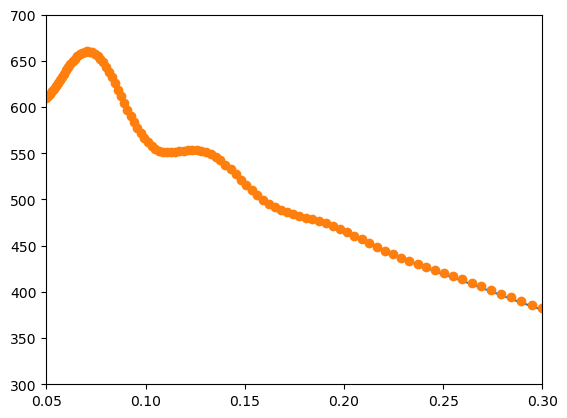

In [24]:
plt.plot(ptable[:,0], ptable[:,0] * ptable[:,1])
plt.plot(ptable2[:,0], ptable2[:,0] * ptable2[:,1] ,'o')

plt.xlim(0.05, 0.3)
plt.ylim(300,700)

(-0.01, 0.01)

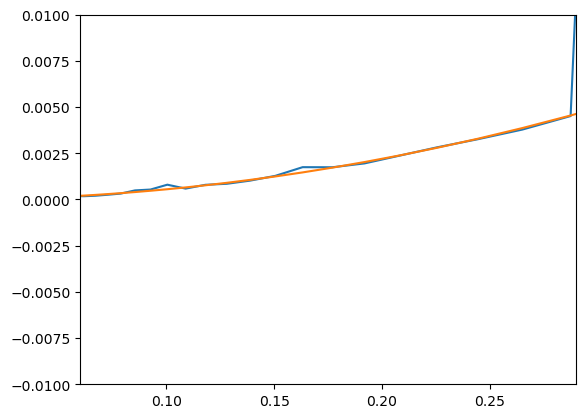

In [30]:
plt.plot(ptable[:,0], np.interp(ptable[:,0],ptable2[:,0], ptable2[:,1]) / ptable[:,1] - 1)
plt.plot(ptable[:,0], ptable[:,0]**2 * 0.055)

plt.xlim(0.06, 0.29)
plt.ylim(-0.01,0.01)

In [37]:
modPT = Zenbu(kint, pint,jn=5, kmin=0.05, kmax=0.3, nk=30)

def ptable_func(pint):
    modPT.update_power_spectrum(pint)
    ptable = modPT.make_ptable()
    return ptable

ptable_jit = jit(ptable_func)
ptable_jit(pint)

t1 = time.time()
ptable2 = ptable_jit(pint)
t2 = time.time()

print(t2-t1)

0.01740407943725586


(300.0, 700.0)

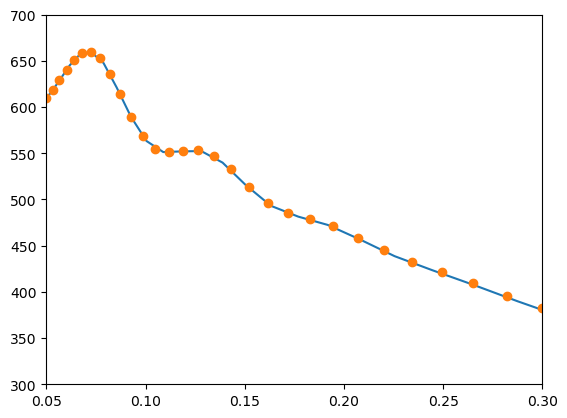

In [38]:
plt.plot(ptable[:,0], ptable[:,0] * ptable[:,1])
plt.plot(ptable2[:,0], ptable2[:,0] * ptable2[:,1] ,'o')

plt.xlim(0.05, 0.3)
plt.ylim(300,700)

(-0.01, 0.01)

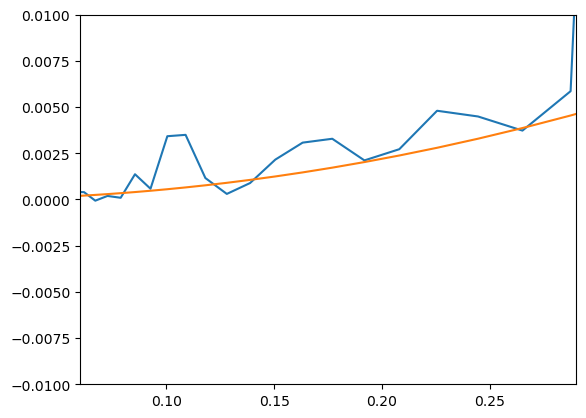

In [39]:
plt.plot(ptable[:,0], np.interp(ptable[:,0],ptable2[:,0], ptable2[:,1]) / ptable[:,1] - 1)
plt.plot(ptable[:,0], ptable[:,0]**2 * 0.055)

plt.xlim(0.06, 0.29)
plt.ylim(-0.01,0.01)